In [1]:
import json
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from certainty_estimator.predict_certainty import CertaintyEstimator
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\12406\AppData\Local\Temp\ipykernel_21224\3164971812.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = []
with open('LIAR_test_explain_then_score_gpt-4-0125-preview_temp0.5_calibrated.jsonl', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [3]:
sentence_estimator = CertaintyEstimator(task='sentence-level', use_auth_token=False)

C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\tokenization_utils_base.py:1714: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
C:\Users\12406\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\modeling_utils.py:2193: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [4]:
df['certainty'] = df['calibrated-uncertainty'].apply(lambda x: abs(0.5-x) * 2)

In [5]:
findings = [item['gpt-answer'] for item in data]
df['assertivity'] = [value / 6 for value in sentence_estimator.predict(findings, tqdm=tqdm)]

  0%|          | 0/8 [00:00<?, ?it/s]

9it [01:30, 10.06s/it]                       


C:\Users\12406\AppData\Local\Temp\ipykernel_21224\2347347096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['certainty'], label='Certainty Distribution', kde=True, color='red')
C:\Users\12406\AppData\Local\Temp\ipykernel_21224\2347347096.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

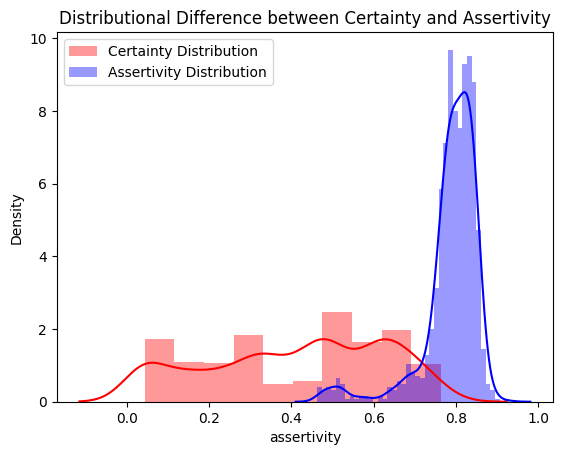

In [6]:
sns.distplot(df['certainty'], label='Certainty Distribution', kde=True, color='red')
sns.distplot(df['assertivity'], label='Assertivity Distribution', kde=True, color='blue')
plt.legend()
plt.title('Distributional Difference between Certainty and Assertivity')
plt.show()

In [7]:
print(f"Max of Assertivity Distribution: {df['assertivity'].max()}")
print(f"Min of Assertivity Distribution: {df['assertivity'].min()}")
print(f"Max of Certainty Distribution: {df['calibrated-uncertainty'].max()}")
print(f"Min of Certainty Distribution: {df['calibrated-uncertainty'].min()}")

Max of Assertivity Distribution: 0.9288166364034017
Min of Assertivity Distribution: 0.46177490552266437
Max of Certainty Distribution: 0.8814685911
Min of Certainty Distribution: 0.1379802581


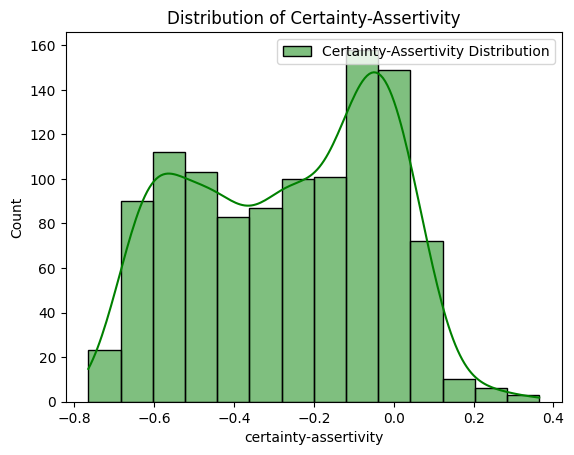

In [8]:
df['certainty-assertivity'] = df['calibrated-uncertainty'] - df['assertivity']
sns.histplot(df['certainty-assertivity'], kde=True, color='green', label='Certainty-Assertivity Distribution')
plt.legend()
plt.title('Distribution of Certainty-Assertivity')
plt.show()

In [9]:
mean_certainty_assertivity = df['certainty-assertivity'].mean()
print(f"Mean of Certainty-Assertivity Distribution: {mean_certainty_assertivity}")
print(f"Max of Certainty-Assertivity Distribution: {df['certainty-assertivity'].max()}")
print(f"Min of Certainty-Assertivity Distribution: {df['certainty-assertivity'].min()}")


Mean of Certainty-Assertivity Distribution: -0.26603217400842794
Max of Certainty-Assertivity Distribution: 0.36433470612720137
Min of Certainty-Assertivity Distribution: -0.7647801681034098


In [10]:
# Calculate the absolute certainty-assertivity
df['abs_certainty-assertivity'] = df['certainty-assertivity'].abs()

# High assertivity calibrated (absolute certainty-assertivity < 0.1)
high_assertivity_calibrated = df[df['abs_certainty-assertivity'] < 0.1].nlargest(1, 'assertivity')[['assertivity', 'gpt-answer']]
low_assertivity_calibrated = df[df['abs_certainty-assertivity'] < 0.1].nsmallest(1, 'assertivity')[['assertivity', 'gpt-answer']]

# High assertivity uncalibrated (absolute certainty-assertivity > 0.1)
high_assertivity_uncalibrated = df[df['abs_certainty-assertivity'] > 0.1].nlargest(1, 'assertivity')[['assertivity', 'gpt-answer']]
low_assertivity_uncalibrated = df[df['abs_certainty-assertivity'] > 0.1].nsmallest(1, 'assertivity')[['assertivity', 'gpt-answer']]

# Display the results with wrapped output
pd.set_option('display.max_colwidth', None)
print("High Assertivity Calibrated:\n", high_assertivity_calibrated.to_string(index=False))
print("Low Assertivity Calibrated:\n", low_assertivity_calibrated.to_string(index=False))
print("High Assertivity Uncalibrated:\n", high_assertivity_uncalibrated.to_string(index=False))
print("Low Assertivity Uncalibrated:\n", low_assertivity_uncalibrated.to_string(index=False))
pd.reset_option('display.max_colwidth')



High Assertivity Calibrated:
  assertivity                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              